## A computer Vision model that identifies fashion items
* About data : the fashinMNIST dataset is a popular dataset that is inspired by the original MNIST dataset
* this dataset has 60k training and 20k testing examples of 10 diffrent fashion items on which we will train our model to identify in those 10 types of images using computer vision
* Its a pretty famos dataset this is just my take on it
#### To get started we need to import the dependencies for our code

In [1]:
import torch # for tensor operations
from torch import nn # this is where our building blocks are
import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
import matplotlib.pyplot as plt # for vissulization
from torch.utils.data import DataLoader

In [3]:
# write device agnostic code


In [4]:
# we will download our dataset from torchvision.datasets
train_data=datasets.FashionMNIST(
    root="data",
    train="true", # we will get the training dataset
    download="true",
    transform=torchvision.transforms.ToTensor(), # converts data into tensors
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 211kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.90MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.3MB/s]


In [5]:
# now that we have our dataset for training ready lets do the same for training set
test_data=datasets.FashionMNIST(
    root="data",
    train="False",
    transform=torchvision.transforms.ToTensor(),
    target_transform=None,
    download="True"
)

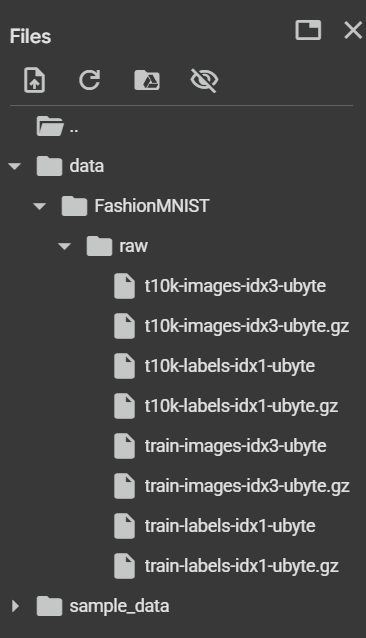
you should have data like this in your directory

In [6]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
# to use this dataset we need a dataloader
BATCH_SIZE=32 # this is a hyperparameter you can change this
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=True)

In [8]:
len(train_dataloader),len(test_dataloader) # divided these databases into batches

(1875, 1875)

In [9]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape # so these are the shepes of our batches

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image shape: torch.Size([1, 28, 28])


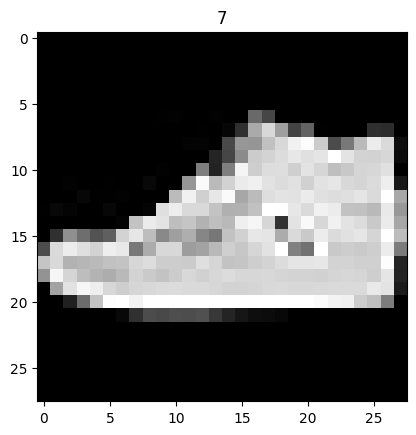

In [10]:
# to see a random image image
import matplotlib.pyplot as plt
image, label = train_data[torch.randint(0, len(train_data), size=[1]).item()]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
# image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

In [11]:
# creating a baseline model
class FashionMNISTv0(nn.Module):
  def __init__(self, ) -> None:
    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(), # convert an image to a vector
        nn.Linear(in_features=(28*28), # size of our image
                  out_features=10),
        nn.Linear(in_features=10,
                  out_features=len(class_names)) # output layer
    )
  def forward(self,x):
    return self.layer_stack(x)


In [12]:
model_0=FashionMNISTv0()
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0053,  0.0203,  0.0120,  ..., -0.0007, -0.0080, -0.0144],
                      [-0.0062,  0.0156, -0.0138,  ..., -0.0305, -0.0042,  0.0235],
                      [ 0.0309, -0.0176,  0.0210,  ...,  0.0032, -0.0334, -0.0302],
                      ...,
                      [ 0.0292, -0.0229,  0.0093,  ...,  0.0100,  0.0284, -0.0127],
                      [-0.0279,  0.0195,  0.0304,  ...,  0.0128,  0.0345, -0.0241],
                      [-0.0320, -0.0356, -0.0084,  ..., -0.0064,  0.0338,  0.0353]])),
             ('layer_stack.1.bias',
              tensor([ 0.0320,  0.0248, -0.0305,  0.0086, -0.0171, -0.0081,  0.0014, -0.0071,
                      -0.0267, -0.0135])),
             ('layer_stack.2.weight',
              tensor([[-0.0372,  0.1851, -0.1799, -0.0410,  0.1802, -0.2832,  0.0240, -0.1316,
                        0.0581, -0.0475],
                      [-0.1505, -0.1578, -0.0821,  0.1954, -0.1742,  0.2612, -0.

In [13]:
# to pick a loss and optimizer function
loss_fn = nn.CrossEntropyLoss()
optimizer =  torch.optim.SGD( params=model_0.parameters(),lr=0.1)

In [14]:
# it will be good to have the time of out model training  so we will use timeit lib


from timeit import default_timer as timer
def print_time(start,end):
  print(f" time took to complete process {end-start}")
  return end-start

In [15]:
from tqdm import tqdm # this is just a loading bar

epochs = 3
train_time_model_0_start = timer()
for epoch in tqdm(range(epochs)):
  print(f'epoch = {epoch}')
  train_loss,test_loss=0,0
  for batch,(x,y) in enumerate(train_dataloader):
    model_0.train() # putting model in training loop
    y_pred=model_0(x) # making predictions
    loss=loss_fn(y_pred,y)  # calculating loss
    train_loss += loss
    optimizer.zero_grad() # refreshing the optimizer
    loss.backward()
    optimizer.step()
    if(batch%400==0):
      print(f"loss for {batch} = {loss}")
  train_loss /= len(train_dataloader)
  # testing loop
  model_0.eval()
  t_loss=0
  with torch.inference_mode():
    for x_t,y_t  in test_dataloader:
      test_preds = model_0(x_t)
      t_loss += loss_fn(test_preds,y_t)
  t_loss = t_loss / len(test_dataloader)

  # now to print everything
  print(f"train loss = {train_loss}")
  print(f"test loss = {test_loss}")
  train_time_model_0_end=timer()
print(f"time taken for model to complete {epochs} is {print_time(train_time_model_0_start,train_time_model_0_end)}")

  0%|          | 0/3 [00:00<?, ?it/s]

epoch = 0
loss for 0 = 2.327115774154663
loss for 400 = 0.6238555908203125
loss for 800 = 0.4676254987716675
loss for 1200 = 0.2688978910446167
loss for 1600 = 0.601937472820282


 33%|███▎      | 1/3 [00:15<00:30, 15.09s/it]

train loss = 0.5890987515449524
test loss = 0
epoch = 1
loss for 0 = 0.4018184542655945
loss for 400 = 0.5549160242080688
loss for 800 = 0.4688858389854431
loss for 1200 = 0.7944316267967224
loss for 1600 = 0.4217112064361572


 67%|██████▋   | 2/3 [00:29<00:14, 14.89s/it]

train loss = 0.476845383644104
test loss = 0
epoch = 2
loss for 0 = 0.4052754342556
loss for 400 = 0.8036231994628906
loss for 800 = 0.41486024856567383
loss for 1200 = 0.5374499559402466
loss for 1600 = 0.6393051743507385


100%|██████████| 3/3 [00:44<00:00, 14.69s/it]

train loss = 0.4542714059352875
test loss = 0
 time took to complete process 44.07713643700001
time taken for model to complete 3 is 44.07713643700001


In [16]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [17]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module):

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}


In [18]:
model_0_eval = eval_model(
    model_0,
    test_dataloader,
    loss_fn
)
model_0_eval

{'model_name': 'FashionMNISTv0',
 'model_loss': 0.4215358793735504,
 'model_acc': 0.0}

In [19]:
# moving forward calculations will be done on gpu so this is the device agnostic code :
device = "cuda" if torch.cuda.is_available() else "cpu"

In [20]:
 # this is pretty doog but i think we can do better with some non linear layers in out neural network
class FashionMNISTv1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_features:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),                          # adding this layer for non linear function
        nn.Linear(in_features=hidden_units,
                  out_features=output_features),
        nn.ReLU()                           # adding this layer for non linear function
    )
  def forward(self,x):
    return self.layer_stack(x)

In [21]:
torch.manual_seed(54)
torch.cuda.manual_seed(54)
model_1=FashionMNISTv1(input_shape=28*28,
                       hidden_units=10,
                       output_features=10).to(device) # sends our model to targer device

In [22]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0048,  0.0105,  0.0350,  ..., -0.0073, -0.0148,  0.0155],
                      [-0.0010,  0.0154, -0.0201,  ..., -0.0016, -0.0308, -0.0136],
                      [ 0.0310,  0.0236,  0.0022,  ..., -0.0248, -0.0297,  0.0322],
                      ...,
                      [ 0.0223, -0.0187, -0.0324,  ...,  0.0321, -0.0055,  0.0224],
                      [-0.0029,  0.0055, -0.0031,  ..., -0.0168, -0.0315, -0.0326],
                      [ 0.0086, -0.0148, -0.0176,  ...,  0.0263, -0.0341,  0.0180]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([ 0.0175, -0.0333,  0.0120, -0.0131,  0.0157, -0.0094,  0.0133, -0.0190,
                      -0.0098,  0.0128], device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[-0.2332, -0.2071,  0.1406,  0.0911,  0.2594,  0.2039,  0.0819,  0.1861,
                       -0.1327,  0.2995],
                      [-0

In [23]:
# we will keep the loss and equilizer functions same they are quite capable so...
loss_fn = nn.CrossEntropyLoss()
optimizer =  torch.optim.SGD( params=model_1.parameters(),lr=0.01)


In [24]:
# we will have multiple itterations of diffrent model types so its better to functionise the train and test codes

def train_model(model:torch.nn.Module,
                data_loader : torch.utils.data.DataLoader,
                loss_fn:torch.nn.Module,
                optimizer,
                device:torch.device=device):
  train_loss=0
  model.to(device)
  for batch,(x,y) in enumerate(data_loader):
    x,y=x.to(device),y.to(device)
    y_pred=model(x)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch%100==0 :
      print(f"batch : {batch} loss = {loss}")
  train_loss /= len(data_loader)
  print(f"average training loss per batch is {train_loss} ")



In [25]:
# the test function

def test_model(model:torch.nn.Module,
                data_loader : torch.utils.data.DataLoader,
                loss_fn:torch.nn.Module,
                device:torch.device=device):
    model.eval()
    test_loss, test_acc = 0, 0
    model.to(device)
    with torch.inference_mode():
        for x_test,y_test in data_loader:
            x_test, y_test = x_test.to(device), y_test.to(device)
            y_t_preds=model(x_test)
            test_loss+=loss_fn(y_t_preds,y_test)

        test_loss/=len(data_loader)
        test_acc/=len(data_loader)
        print(f"test loss per epoch is : {test_loss:.5f}")
        print(f"test accuracy per epoch is : {test_acc:.2f}%")

In [26]:
# not to train our non linear model :

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs=3
for epoch in range(epochs):
  print(f"epoch : {epoch}")
  train_model(
      model=model_1,
      data_loader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer
  )
  test_model(
      model=model_1,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
  )
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu)

epoch : 0
batch : 0 loss = 2.2999846935272217
batch : 100 loss = 2.219233751296997
batch : 200 loss = 1.9092820882797241
batch : 300 loss = 2.0660667419433594
batch : 400 loss = 1.662981629371643
batch : 500 loss = 1.7469995021820068
batch : 600 loss = 1.5841375589370728
batch : 700 loss = 1.4516000747680664
batch : 800 loss = 1.2578933238983154
batch : 900 loss = 1.2276604175567627
batch : 1000 loss = 1.2485380172729492
batch : 1100 loss = 1.174747109413147
batch : 1200 loss = 1.0258829593658447
batch : 1300 loss = 1.2680851221084595
batch : 1400 loss = 1.0827401876449585
batch : 1500 loss = 0.9306951761245728
batch : 1600 loss = 1.067525863647461
batch : 1700 loss = 1.2395752668380737
batch : 1800 loss = 1.3557400703430176
average training loss per batch is 1.4837003946304321 
test loss per epoch is : 1.13602
test accuracy per epoch is : 0.00%
epoch : 1
batch : 0 loss = 1.1831979751586914
batch : 100 loss = 1.1542330980300903
batch : 200 loss = 1.2462722063064575
batch : 300 loss = 0

In [27]:
model_1.to("cpu")
# Calculate model 0 results on test dataset
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn
)
model_1_results

{'model_name': 'FashionMNISTv1',
 'model_loss': 0.7679459452629089,
 'model_acc': 0.0}

In [28]:
model_0_eval

{'model_name': 'FashionMNISTv0',
 'model_loss': 0.4215358793735504,
 'model_acc': 0.0}

as you can see out model is not performing so well and it took more time to be executed what we conclude for this is that we need other approach to solve this problem
* more specifically a architecure that helps us understand the patterns more
* that architecture being the CNN (Convolutional Neural Network) this is a architecure that uses muliple layers to find patterns in a dataset of images
* to understand this more you can visit : https://poloclub.github.io/cnn-explainer/
> to get started with our frist CNN model we will build a model

In [29]:
class FashionMNISTv2(nn.Module):
  def __init__(self,
               in_shape,
               out_shape,
               hidden_units) -> None:   # taking inputs for the model hyperparameters
    super().__init__()
    self.block_1=nn.Sequential(
        nn.Conv2d(                      # this is a convolutionla layer for 2d images
            in_channels=in_shape,       # number of channels per input in out case its 1 i.e grayscale
            out_channels=hidden_units,  # the number of neurons its giving output to
            kernel_size=3,              # this is a size of our filter that wil be applied when processing our image
            padding=1,                  # padding added on all 4 sides so our model does not miss the data at the corner
            stride=1                    # this is the number for how big of a step the layer takes
        ),
        nn.ReLU(),                      # non linear activation function
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            padding=1,
            stride=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(                   # applies pooling to our image
            kernel_size=2,
            stride=2
        )
    )
    self.block_2=nn.Sequential(         # the same layer stack again but with 1 layer for activation function and layer each
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
    )
    self.classifer=nn.Sequential(       # this is our linear layer that classifies the actual
        nn.Flatten(),
        nn.Linear(
            in_features=hidden_units*7*7,
            out_features=out_shape
        )
    )
  def forward(self,x:torch.Tensor):     # calculating the forward pass
    x=self.block_1(x)
    x=self.block_2(x)
    x=self.classifer(x)
    return x

In [30]:
model_2=FashionMNISTv2(
    in_shape=1,
    hidden_units=10,
    out_shape=len(class_names)
).to(device)

In [31]:
model_2

FashionMNISTv2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [32]:
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[-1.3810e+00, -4.2052e-02,  1.9936e-01,  ..., -8.7476e-02,
           2.4630e+00,  1.0222e+00],
         [-5.7393e-02, -1.1164e+00,  4.6139e-01,  ..., -3.0118e-01,
          -1.6885e+00, -1.6797e+00],
         [ 3.0254e-01,  1.6011e-01,  5.4290e-01,  ..., -6.5338e-01,
          -2.1816e+00, -1.2910e-01],
         ...,
         [-2.3060e-02,  1.7328e+00,  8.5365e-01,  ..., -6.2764e-01,
           7.8558e-01,  3.4178e-01],
         [-4.9469e-01,  6.3162e-01,  1.4292e-01,  ..., -1.2175e+00,
           1.2157e+00, -1.8365e+00],
         [ 1.5530e+00, -9.8449e-04, -5.0618e-02,  ...,  1.2521e+00,
           2.0304e+00,  1.0501e+00]],

        [[-1.5112e+00,  3.1304e+00,  1.2487e+00,  ...,  8.1091e-01,
           1.8796e+00, -1.0135e+00],
         [-2.6869e-02,  1.2975e+00, -2.2128e-01, 

In [33]:
# right now we cannot pass out data through the images
# if we try to pass our image through the conv2d layter lets see what happens
torch.manual_seed(42)

conv_layer=nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    stride=1,
    padding=0
)
# now to pass our image through the conv layer
# conv_layer(image)
# the output is given below

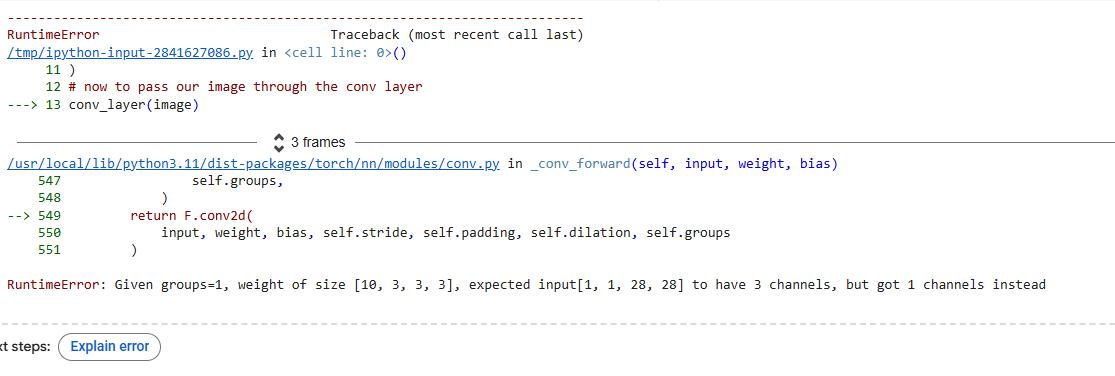

In [34]:
"""
  why this happens is that out in channels expect an input of size [10,3,3,3]
  but it got [1,1,28,28] that is [batch_size, color_channels, height, width]
  to fix this we need to unsqueeze our image
"""

test_image.unsqueeze(dim=0).shape # adds a extra dimentions to our image at dimention 0

torch.Size([1, 3, 64, 64])

In [35]:
# test this with our testing layer
conv_layer(test_image.unsqueeze(dim=0)).shape
# now this returns us the updated values


torch.Size([1, 10, 62, 62])

In [36]:
# now to choose the loss function
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model_2.parameters(),lr=0.075)


In [37]:
# to create a training loop
epochs = 5
for epoch in range(epochs):
  print(f"epoch {epoch}")
  train_model(
      model=model_2,
      data_loader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      device=device
  )
  test_model(
      model=model_2,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      device=device
  )

epoch 0
batch : 0 loss = 2.308259963989258
batch : 100 loss = 1.1119662523269653
batch : 200 loss = 0.7301254272460938
batch : 300 loss = 0.822667121887207
batch : 400 loss = 0.4623333513736725
batch : 500 loss = 0.4617418646812439
batch : 600 loss = 0.5270542502403259
batch : 700 loss = 0.2544286549091339
batch : 800 loss = 0.6960142850875854
batch : 900 loss = 0.5669102668762207
batch : 1000 loss = 0.3642004132270813
batch : 1100 loss = 0.4350135922431946
batch : 1200 loss = 0.7265110015869141
batch : 1300 loss = 0.36517974734306335
batch : 1400 loss = 0.5156479477882385
batch : 1500 loss = 0.5367535352706909
batch : 1600 loss = 0.3359941244125366
batch : 1700 loss = 0.23130781948566437
batch : 1800 loss = 0.2700175642967224
average training loss per batch is 0.577251136302948 
test loss per epoch is : 0.36457
test accuracy per epoch is : 0.00%
epoch 1
batch : 0 loss = 0.3308491110801697
batch : 100 loss = 0.23276212811470032
batch : 200 loss = 0.25101926922798157
batch : 300 loss = 

In [38]:
image.unsqueeze(dim=0).shape

torch.Size([1, 1, 28, 28])

Pullover


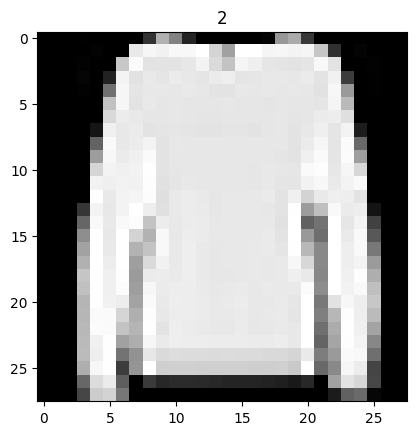

In [52]:
# to check test our model
import matplotlib.pyplot as plt
image, label = train_data[torch.randint(0, len(train_data), size=[1]).item()]
plt.imshow(image.squeeze(), cmap="gray")
image = image.to(device) # Move the image to the device
preds=model_2(image.unsqueeze(dim=0))
plt.title(label);
print(class_names[label])